In [13]:
%load_ext pandas_td.ipython

The pandas_td.ipython extension is already loaded. To reload it, use:
  %reload_ext pandas_td.ipython


In [14]:
%td_use sample_datasets

INFO: import nasdaq
INFO: import www_access


In [15]:
nasdaq

,field,type,alias
0,symbol,string,
1,open,double,
2,volume,long,
3,high,double,
4,low,double,
5,close,double,


In [16]:
%%td_presto
select count(1) cnt
from nasdaq

,cnt
0,8807278


In [17]:
%%td_presto
select
    -- Time-series index (yearly)
    td_date_trunc('year', time) time,

    -- Same as above
    -- td_time_format(time, 'yyyy-01-01') time,

    count(1) cnt
from
    nasdaq
group by
    1
LIMIT 5

,cnt
time,
2004-01-01,367748
2010-01-01,503399
1994-01-01,151884
1988-01-01,83146
2013-01-01,604731


In [18]:
%matplotlib inline

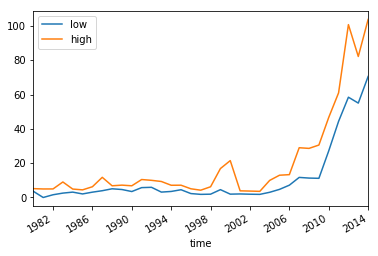

In [19]:
%%td_presto --plot
select
    -- x-axis
    td_date_trunc('year', time) time,

    -- y-axis
    min(low) low,
    max(high) high
from
    nasdaq
where
    symbol = 'AAPL'
group by
    1

In [20]:
TIME_START = '2000-01-01'
TIME_END = '2005-01-01'

In [21]:
%%td_presto
select
    td_date_trunc('year', time) time,
    count(1) cnt
from
    nasdaq
where
    td_time_range(time, '{TIME_START}', '{TIME_END}', 'JST')
group by
    1
order by
    1

,cnt
time,
1999-01-01,1046
2000-01-01,298783
2001-01-01,311386
2002-01-01,325212
2003-01-01,351573
2004-01-01,366239


In [22]:
%%td_hive
select
    td_date_trunc('year', time) time,
    count(1) cnt
from
    nasdaq
where
    td_time_range(time, '{TIME_START}', '{TIME_END}', 'JST')
group by
    1
order by
    1

,cnt
time,
1999-01-01,1046
2000-01-01,298783
2001-01-01,311386
2002-01-01,325212
2003-01-01,351573
2004-01-01,366239
